In [1]:
import os
import json

import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
metrics_file = 'metrics.json'
experiments_dir = os.path.join(os.path.abspath('../'), 'experiments_data')
experiment_time = '20240524T19'

experiment_folders = [f for f in os.listdir(experiments_dir) if f.startswith(experiment_time)]
experiment_folders

['20240524T1900_final', '20240524T1930_final']

In [3]:
def create_dfs(folders):
    dfs = None
    for folder in folders:
        with open(os.path.join(experiments_dir, folder, metrics_file), 'r') as f:
            data = json.load(f)
        df = pd.DataFrame(data)
        dfs = pd.concat([dfs, df], ignore_index=True) if dfs is not None else df
    return dfs

In [4]:
df = create_dfs(experiment_folders)
df.head()

,spread,price_std,transactions_mean,transactions_sum,volume_mean,volume_sum,tick_size,params_id,seed
0,0.003093,0.007440,100.308300,25378,181.786561,45992,0.01,682,0
1,0.003496,0.006507,99.774704,25243,181.328063,45876,0.05,687,0
2,0.003913,0.009049,98.363636,24886,182.426877,46154,0.10,848,0
3,0.004306,0.012201,101.067194,25570,192.217391,48631,0.20,512,0
4,0.006937,0.007952,99.573123,25192,190.521739,48202,0.50,892,0


In [5]:
df.shape

(250, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   spread             250 non-null    float64
 1   price_std          250 non-null    float64
 2   transactions_mean  250 non-null    float64
 3   transactions_sum   250 non-null    int64  
 4   volume_mean        250 non-null    float64
 5   volume_sum         250 non-null    int64  
 6   tick_size          250 non-null    float64
 7   params_id          250 non-null    int64  
 8   seed               250 non-null    int64  
dtypes: float64(5), int64(4)
memory usage: 17.7 KB


In [7]:
data = df.drop(columns=['seed', 'params_id', 'transactions_sum', 'volume_sum'])
data.duplicated().sum()

0

In [8]:
desc_stats = data.groupby('tick_size').agg(['mean', 'std']).T
desc_stats

tick_size                     0.01        0.05        0.10        0.20  \
spread            mean    0.003386    0.003580    0.003877    0.004702   
                  std     0.000353    0.000248    0.000254    0.000503   
price_std         mean    0.008910    0.009060    0.009139    0.009062   
                  std     0.002360    0.002693    0.002411    0.002896   
transactions_mean mean  100.213281   99.941897   99.489170  100.068617   
                  std     2.072730    1.613063    1.866396    1.959313   
volume_mean       mean  183.373281  184.840632  183.315415  187.260158   
                  std     9.511127    8.666395   10.067318    9.195691   

tick_size                     0.50  
spread            mean    0.007252  
                  std     0.001260  
price_std         mean    0.010380  
                  std     0.002806  
transactions_mean mean   98.729644  
                  std     2.154033  
volume_mean       mean  191.751937  
                  std     9.516592

In [9]:
# desc_stats.to_csv('./grouped_stats.csv')

In [10]:
data.describe()

,spread,price_std,transactions_mean,volume_mean,tick_size
count,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.004559,0.009310,99.688522,186.108285,0.172000
std,0.001560,0.002676,2.000321,9.850989,0.176239
min,0.002508,0.004865,94.924901,156.130435,0.010000
25%,0.003511,0.007295,98.379447,179.316205,0.050000
50%,0.003921,0.008490,99.602767,186.009881,0.100000
75%,0.004762,0.011023,101.029645,192.875494,0.200000
max,0.010168,0.022569,105.762846,221.861660,0.500000


In [11]:
# data.describe().to_csv('./desc_stats.csv')

In [12]:
sns.color_palette("mako")

[(0.18195582, 0.11955283, 0.23136943),
 (0.25307401, 0.23772973, 0.48316271),
 (0.21607792, 0.39736958, 0.61948028),
 (0.20344718, 0.56074869, 0.65649508),
 (0.25187832, 0.71827158, 0.67872193),
 (0.54578602, 0.8544913, 0.69848331)]

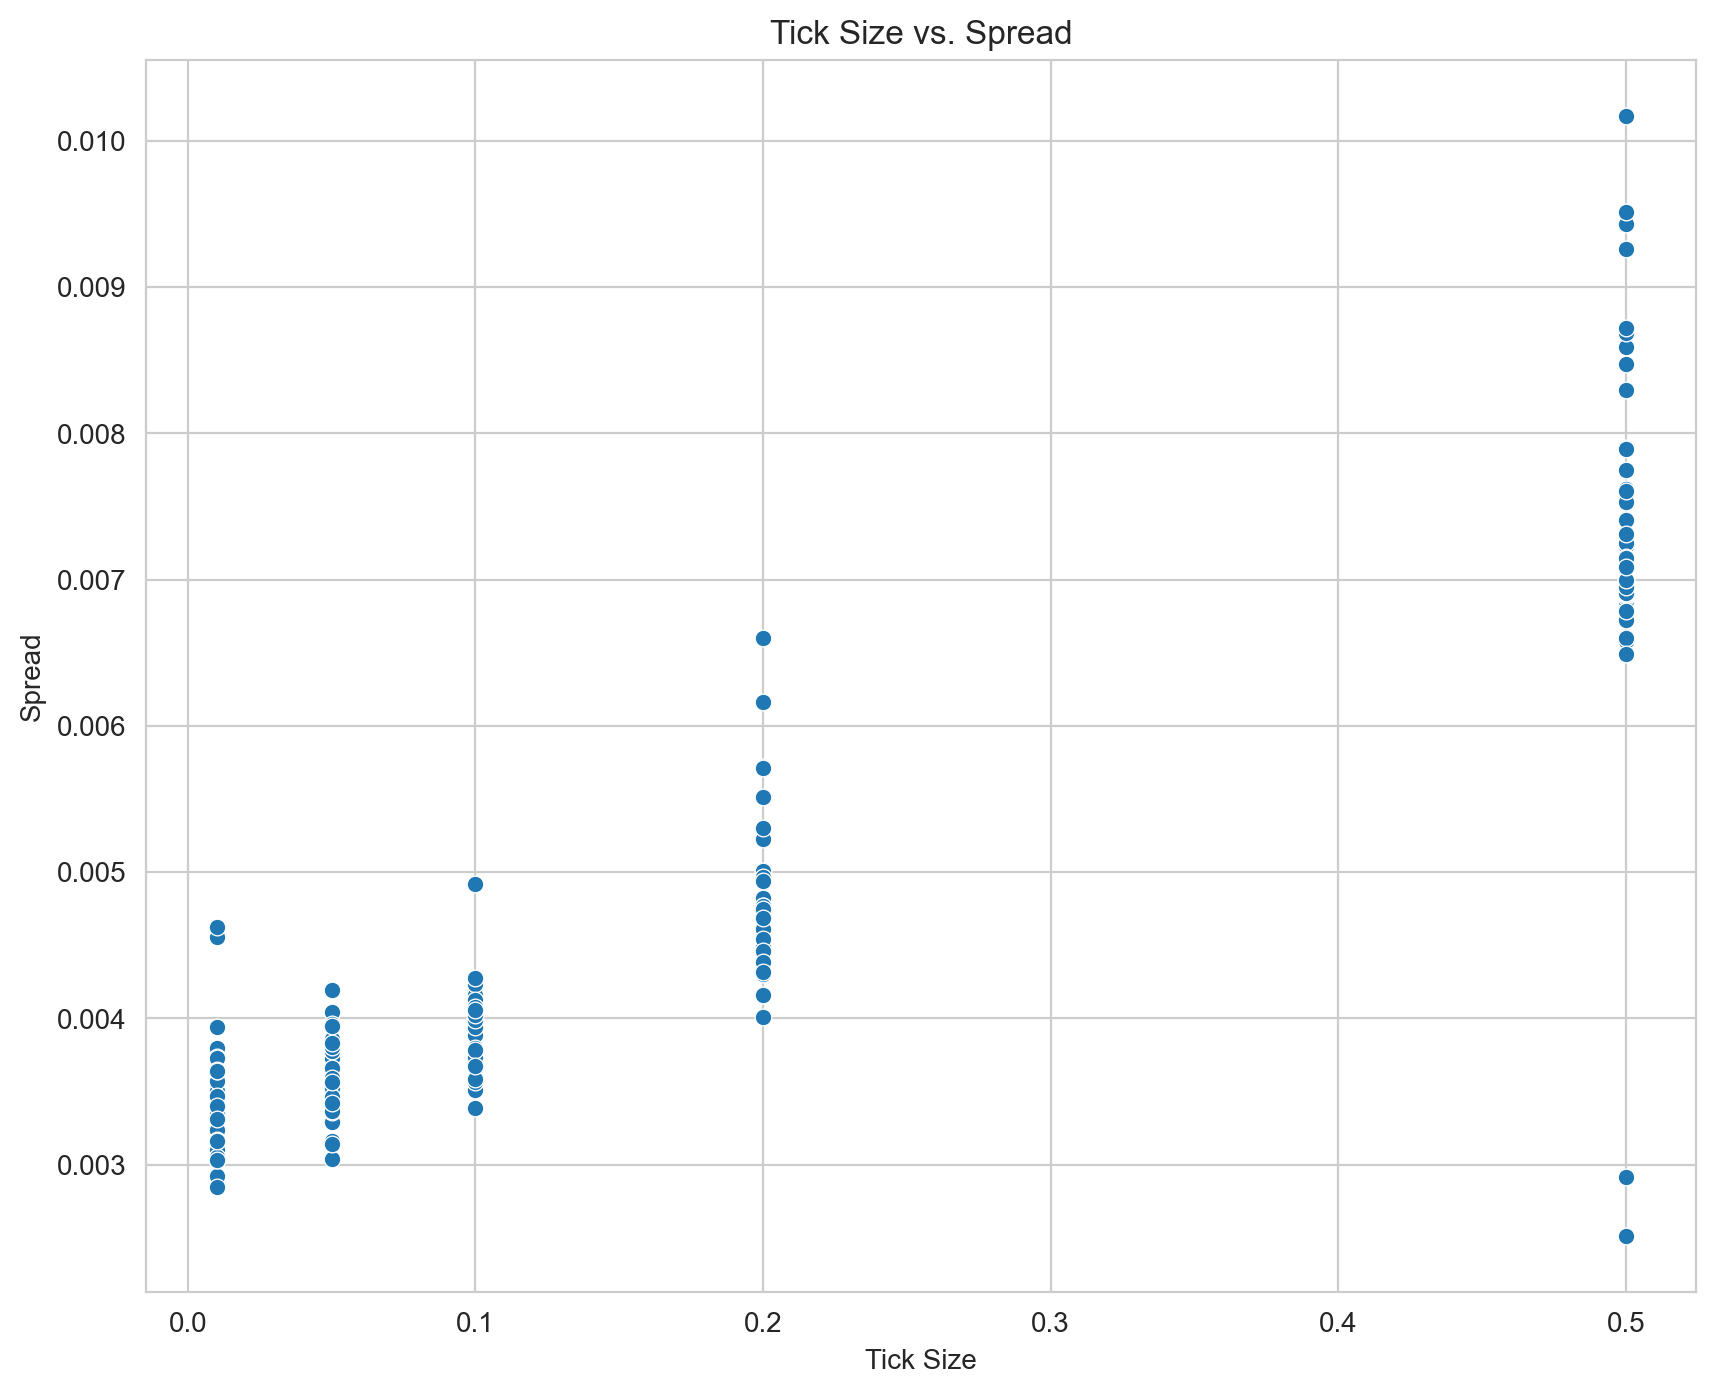

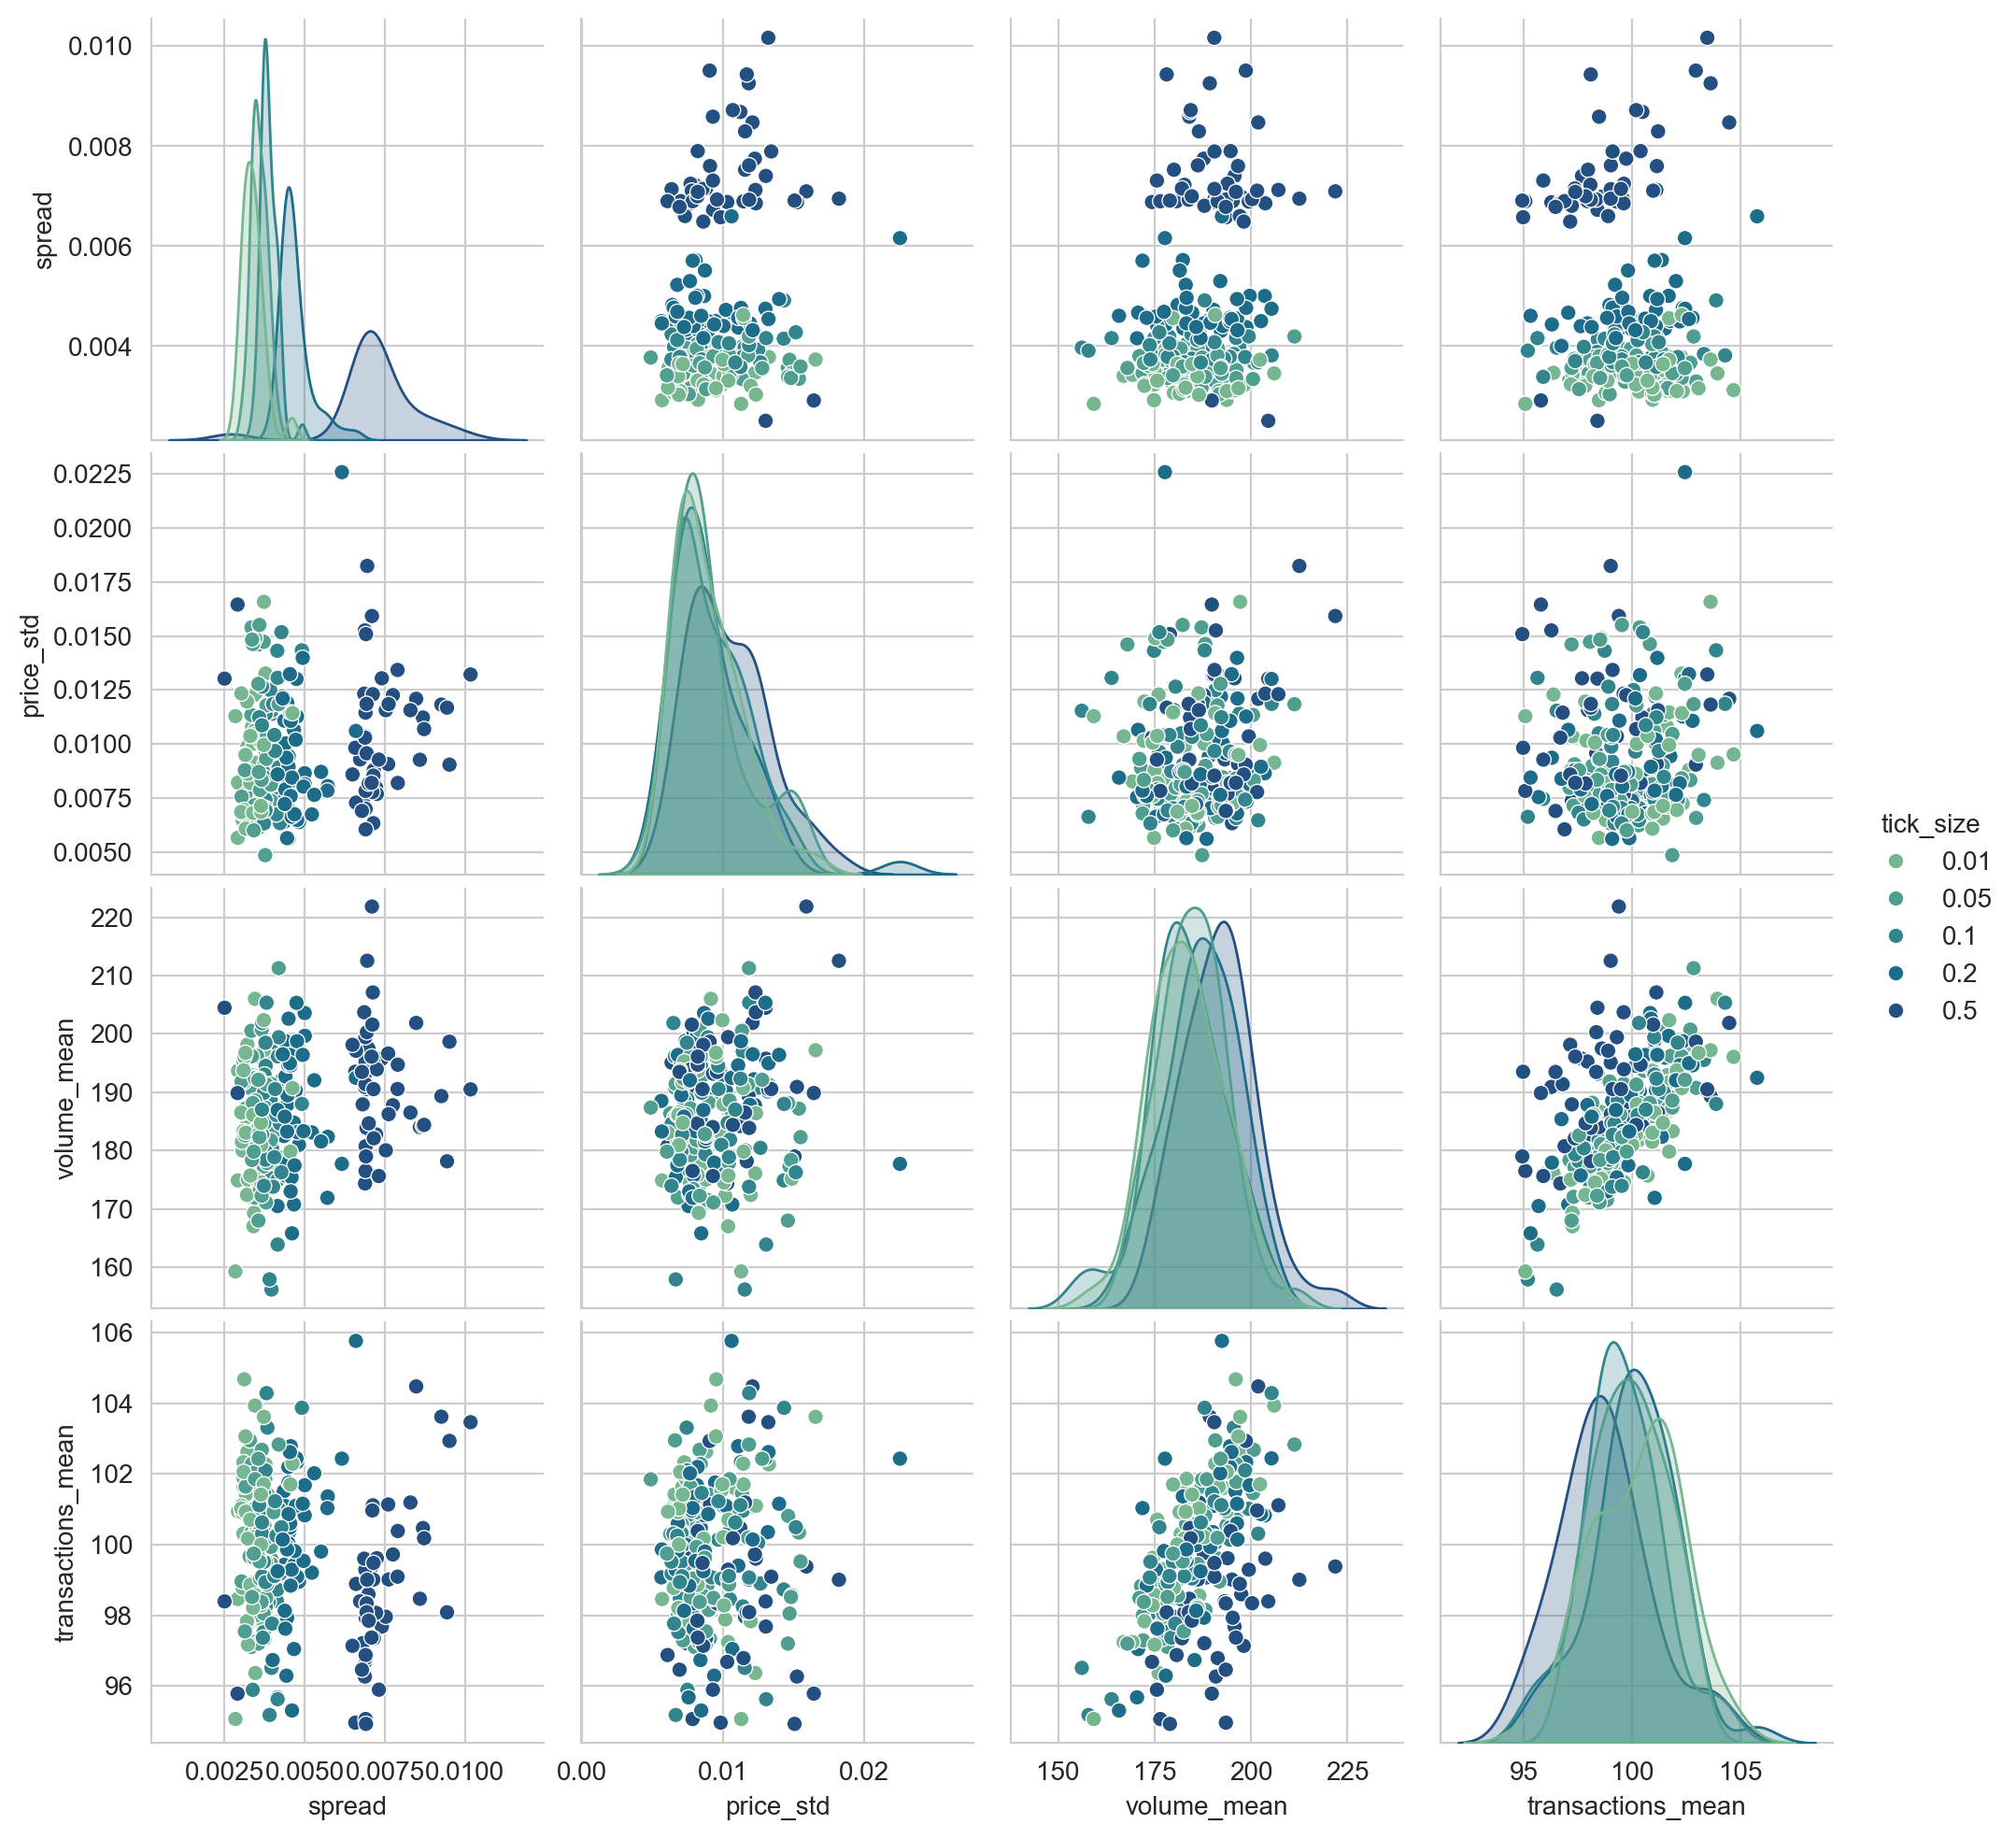

In [13]:
palette = sns.color_palette("crest", 5)

# plt.figure(figsize=(10, 6))
# sns.histplot(df['tick_size'], bins=10, kde=True)
# plt.title('Distribution of Tick Size')
# plt.xlabel('Tick Size')
# plt.ylabel('Frequency')
# plt.show()

vars = ['spread', 'price_std', 'volume_mean', 'transactions_mean']
# Visualize the relationship between tick size and spread
plt.figure(figsize=(10, 8))
sns.scatterplot(x='tick_size', y='spread', data=data)
plt.title('Tick Size vs. Spread')
plt.xlabel('Tick Size')
plt.ylabel('Spread')
plt.show()

# Pairplot to visualize relationships between multiple variables
sns.pairplot(data, vars=vars, hue='tick_size', palette=palette)
# plt.savefig('/Users/egor/Edu/HSE/Diploma/pics/pairplot.jpg', dpi=600)
plt.show()

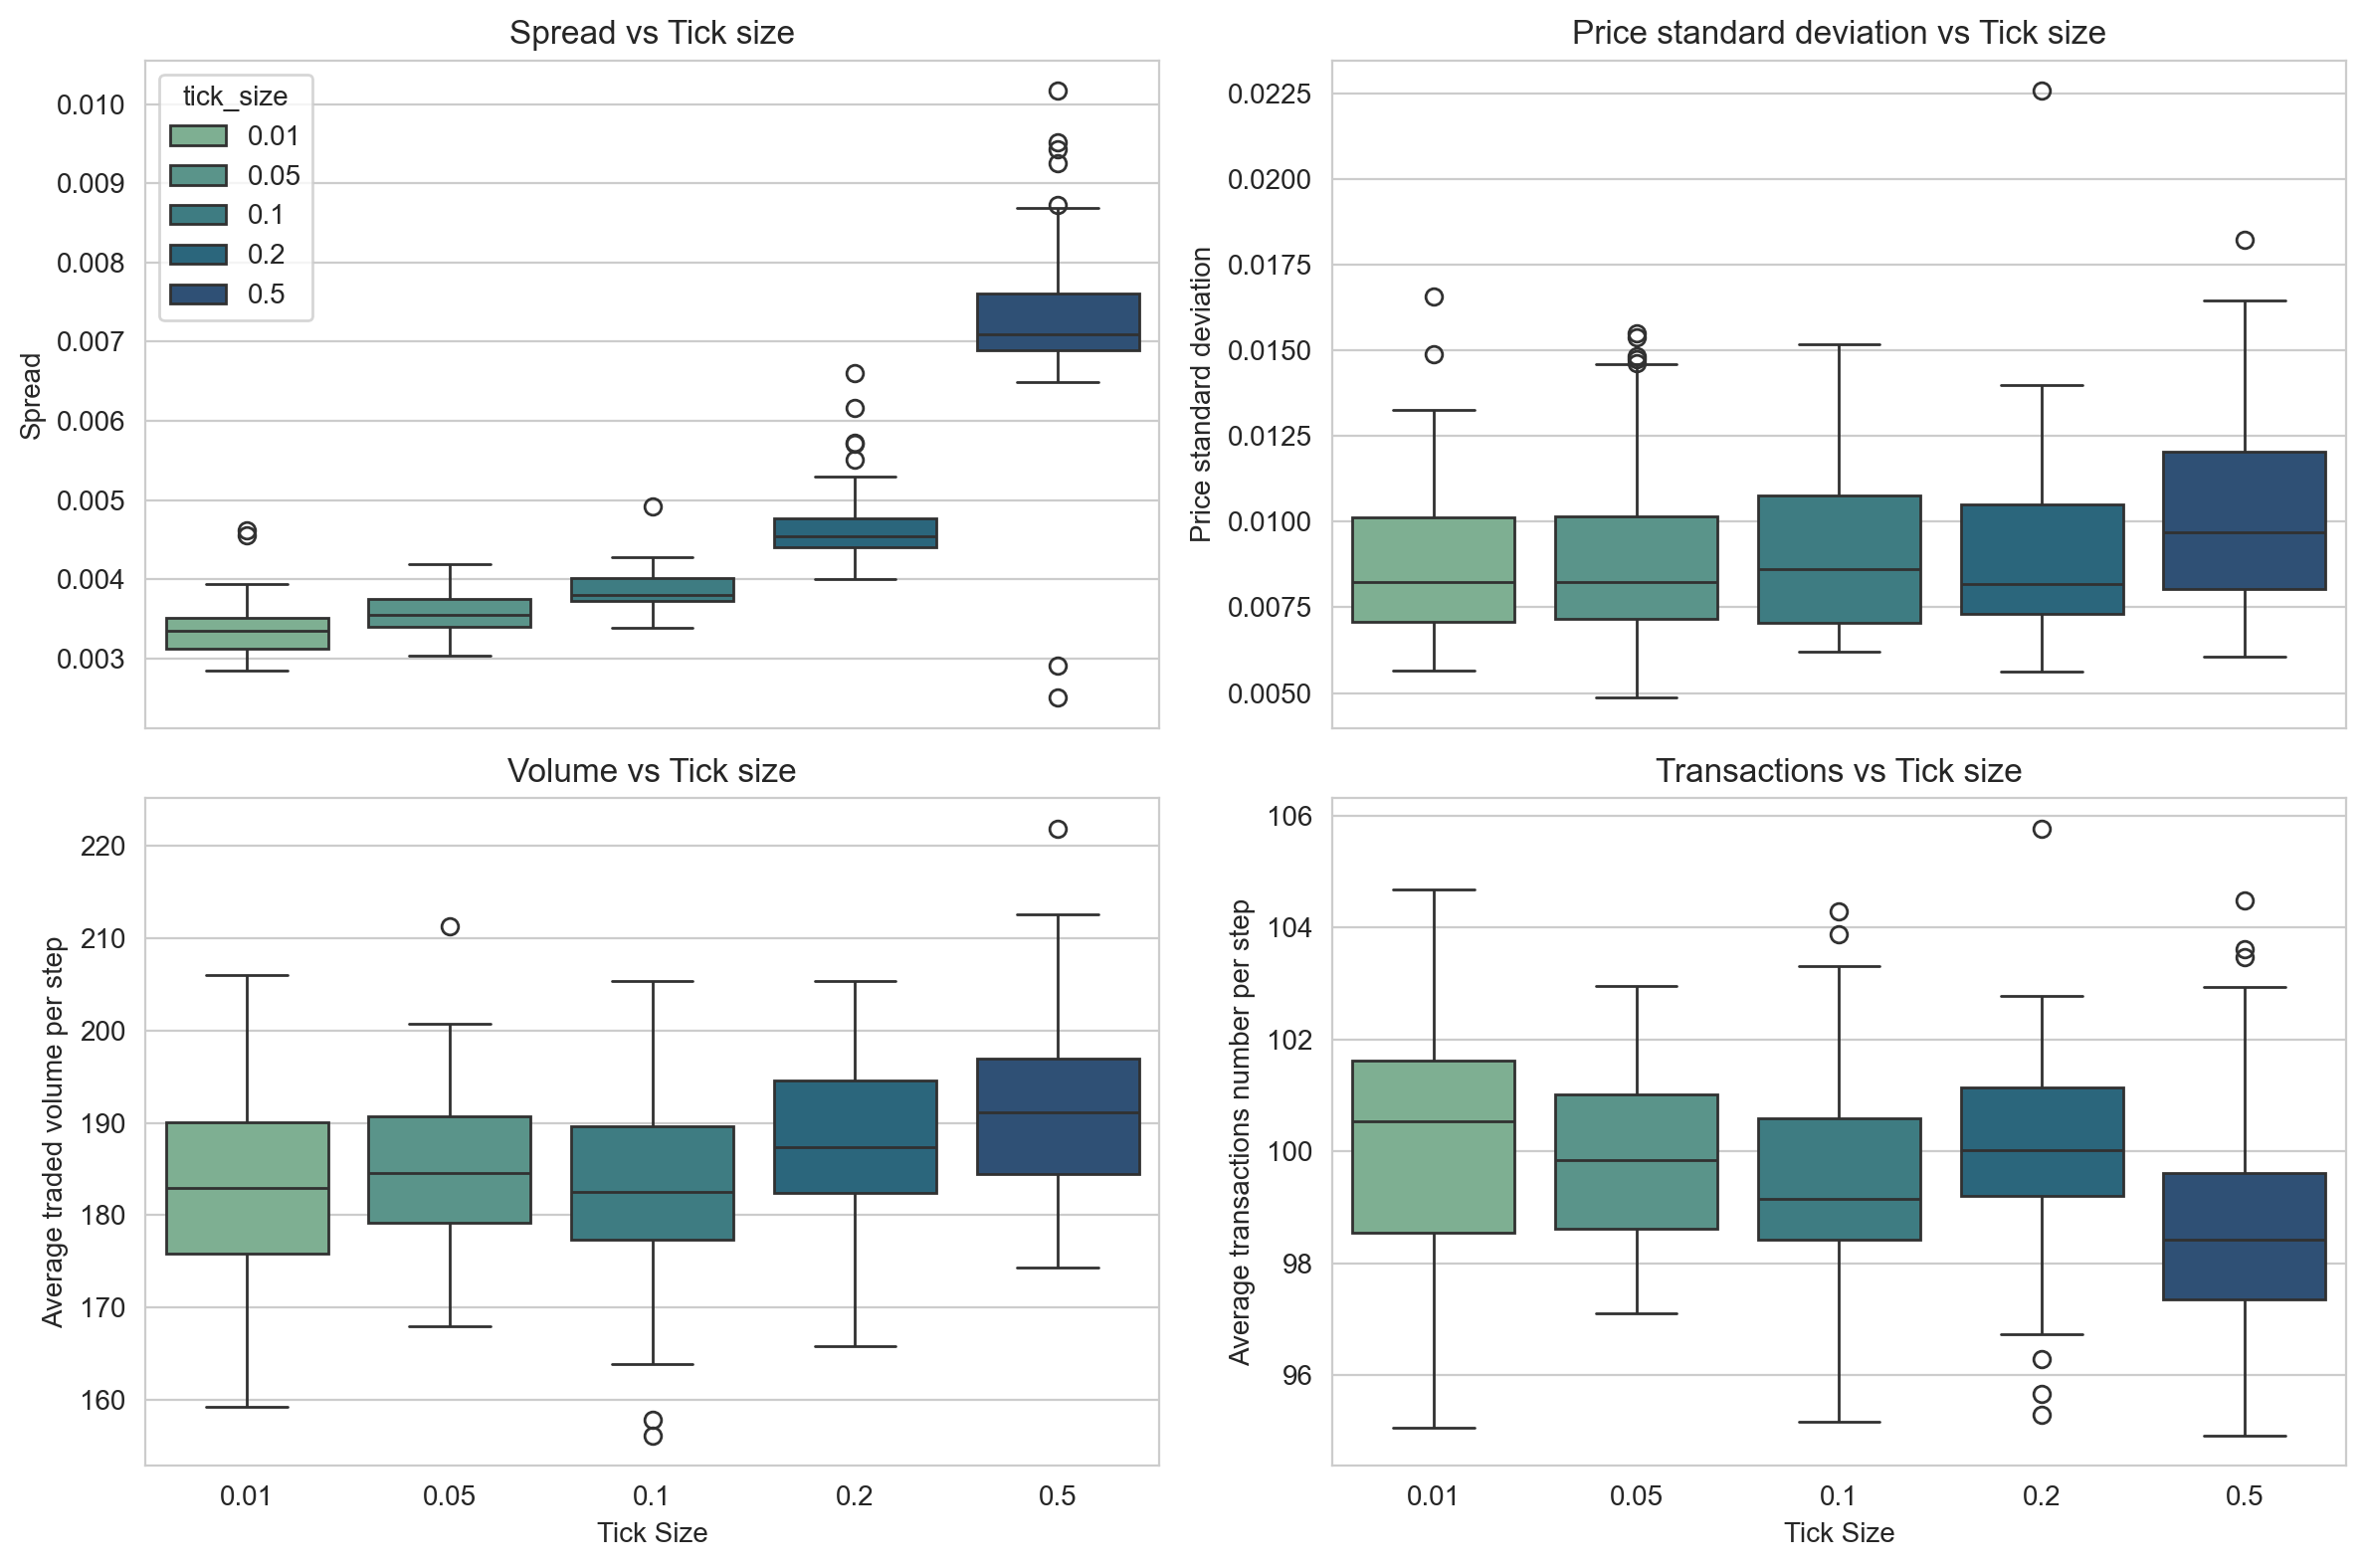

In [22]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
        
sns.boxplot(x='tick_size', y='spread', data=data, ax=axes[0][0], hue='tick_size', legend=True, palette=palette)
axes[0][0].set_title('Spread vs Tick size')
axes[0][0].set_xlabel('')
axes[0][0].set_xticks([])
axes[0][0].set_ylabel('Spread')

# Box plot for price_std
sns.boxplot(x='tick_size', y='price_std', data=data, ax=axes[0][1], hue='tick_size', legend=False, palette=palette)
axes[0][1].set_title('Price standard deviation vs Tick size')
axes[0][1].set_xlabel('')
axes[0][1].set_xticks([])
axes[0][1].set_ylabel('Price standard deviation')

sns.boxplot(x='tick_size', y='volume_mean', data=data, ax=axes[1][0], hue='tick_size', legend=False, palette=palette)
axes[1][0].set_title('Volume vs Tick size')
axes[1][0].set_xlabel('Tick Size')
axes[1][0].set_ylabel('Average traded volume per step')

sns.boxplot(x='tick_size', y='transactions_mean', data=data, ax=axes[1][1], hue='tick_size', legend=False, palette=palette)
axes[1][1].set_title('Transactions vs Tick size')
axes[1][1].set_xlabel('Tick Size')
axes[1][1].set_ylabel('Average transactions number per step')

plt.tight_layout()
# plt.savefig('/Users/egor/Edu/HSE/Diploma/pics/boxplots.jpg', dpi=600)
plt.show()

## Pearson coeff

In [15]:
correlation_matrix = data[['tick_size', 'spread', 'price_std', 'volume_mean', 'transactions_mean']].corr()
correlation_matrix

,tick_size,spread,price_std,volume_mean,transactions_mean
tick_size,1.000000,0.909846,0.192304,0.310225,-0.230937
spread,0.909846,1.000000,0.205878,0.254891,-0.069501
price_std,0.192304,0.205878,1.000000,0.127537,0.050780
volume_mean,0.310225,0.254891,0.127537,1.000000,0.561544
transactions_mean,-0.230937,-0.069501,0.050780,0.561544,1.000000


In [16]:
# correlation_matrix.to_csv('./corr_matrix.csv')

## Regression analysis

In [17]:
regression_results = {}
dependent_vars = ['spread', 'price_std', 'volume_mean', 'transactions_mean']

for var in dependent_vars:
    model = ols(f"{var} ~ tick_size", data=data).fit()
    regression_results[var] = model.summary()

regression_results

{'spread': <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                 spread   R-squared:                       0.828
 Model:                            OLS   Adj. R-squared:                  0.827
 Method:                 Least Squares   F-statistic:                     1192.
 Date:                Sat, 25 May 2024   Prob (F-statistic):           1.02e-96
 Time:                        17:00:40   Log-Likelihood:                 1481.4
 No. Observations:                 250   AIC:                            -2959.
 Df Residuals:                     248   BIC:                            -2952.
 Df Model:                           1                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 -----------------------------------------------------------

## K Means

In [18]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['spread', 'price_std', 'volume_mean', 'transactions_mean']])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

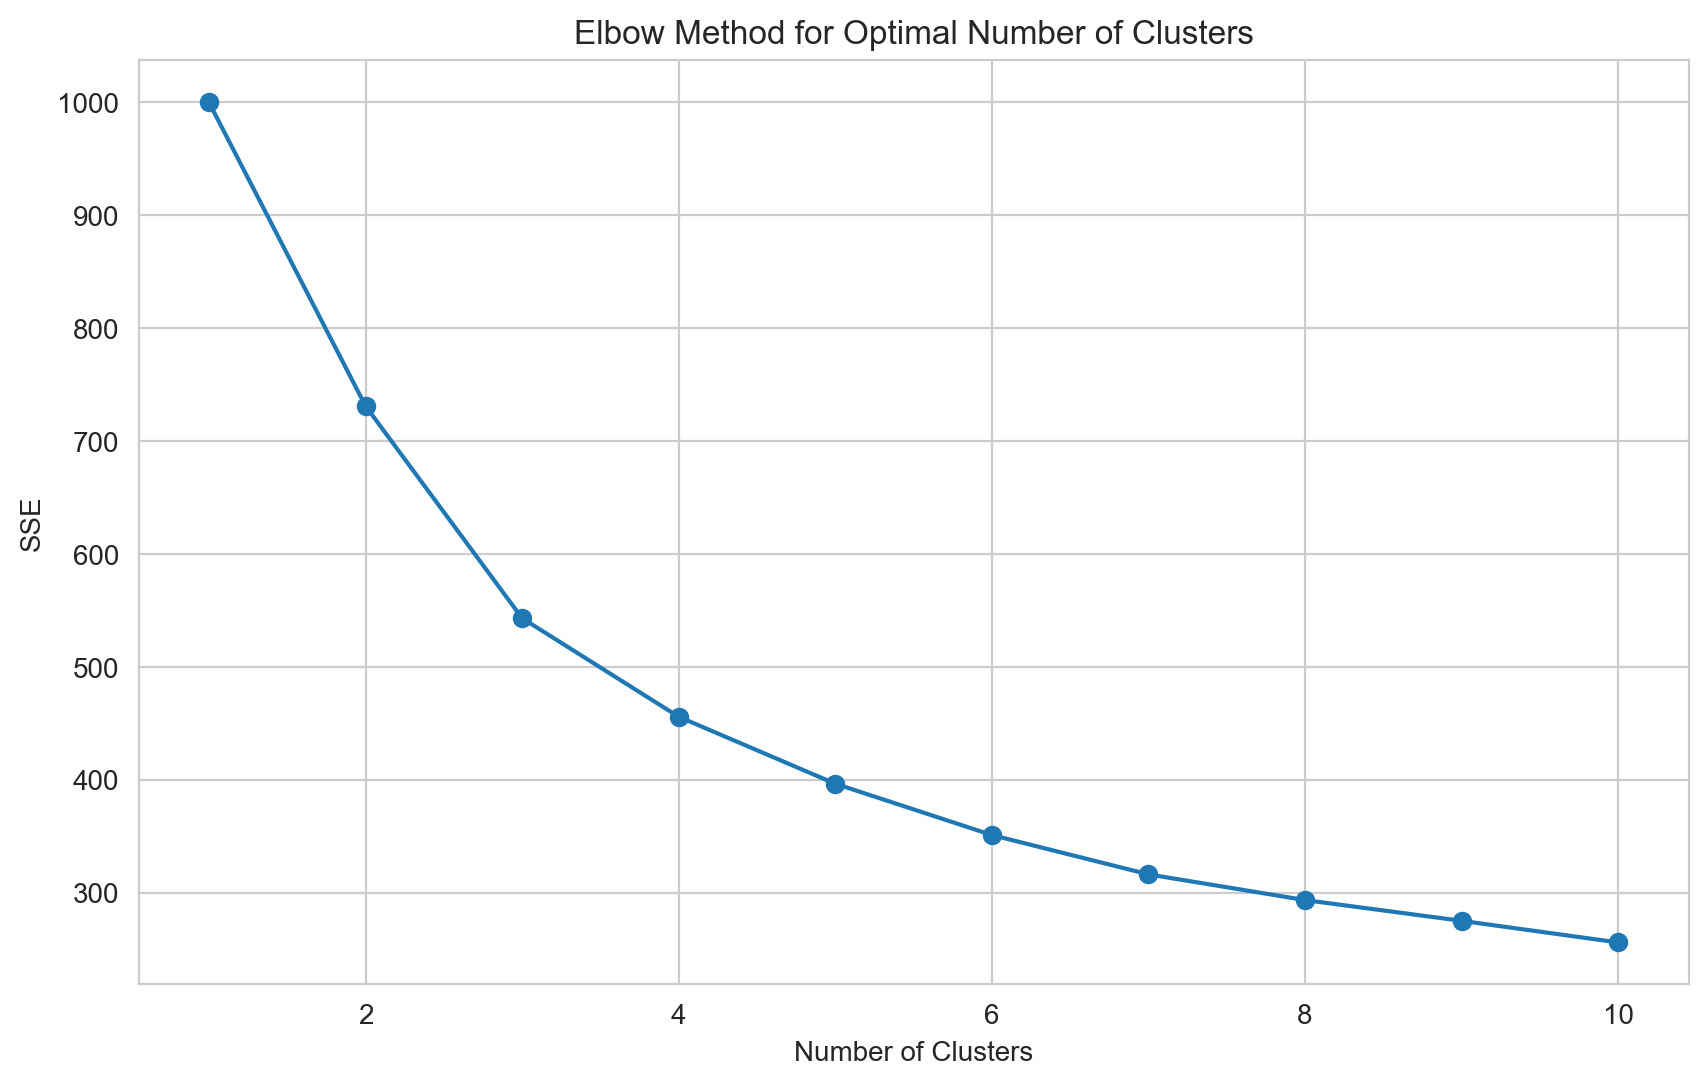

In [19]:
# Elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


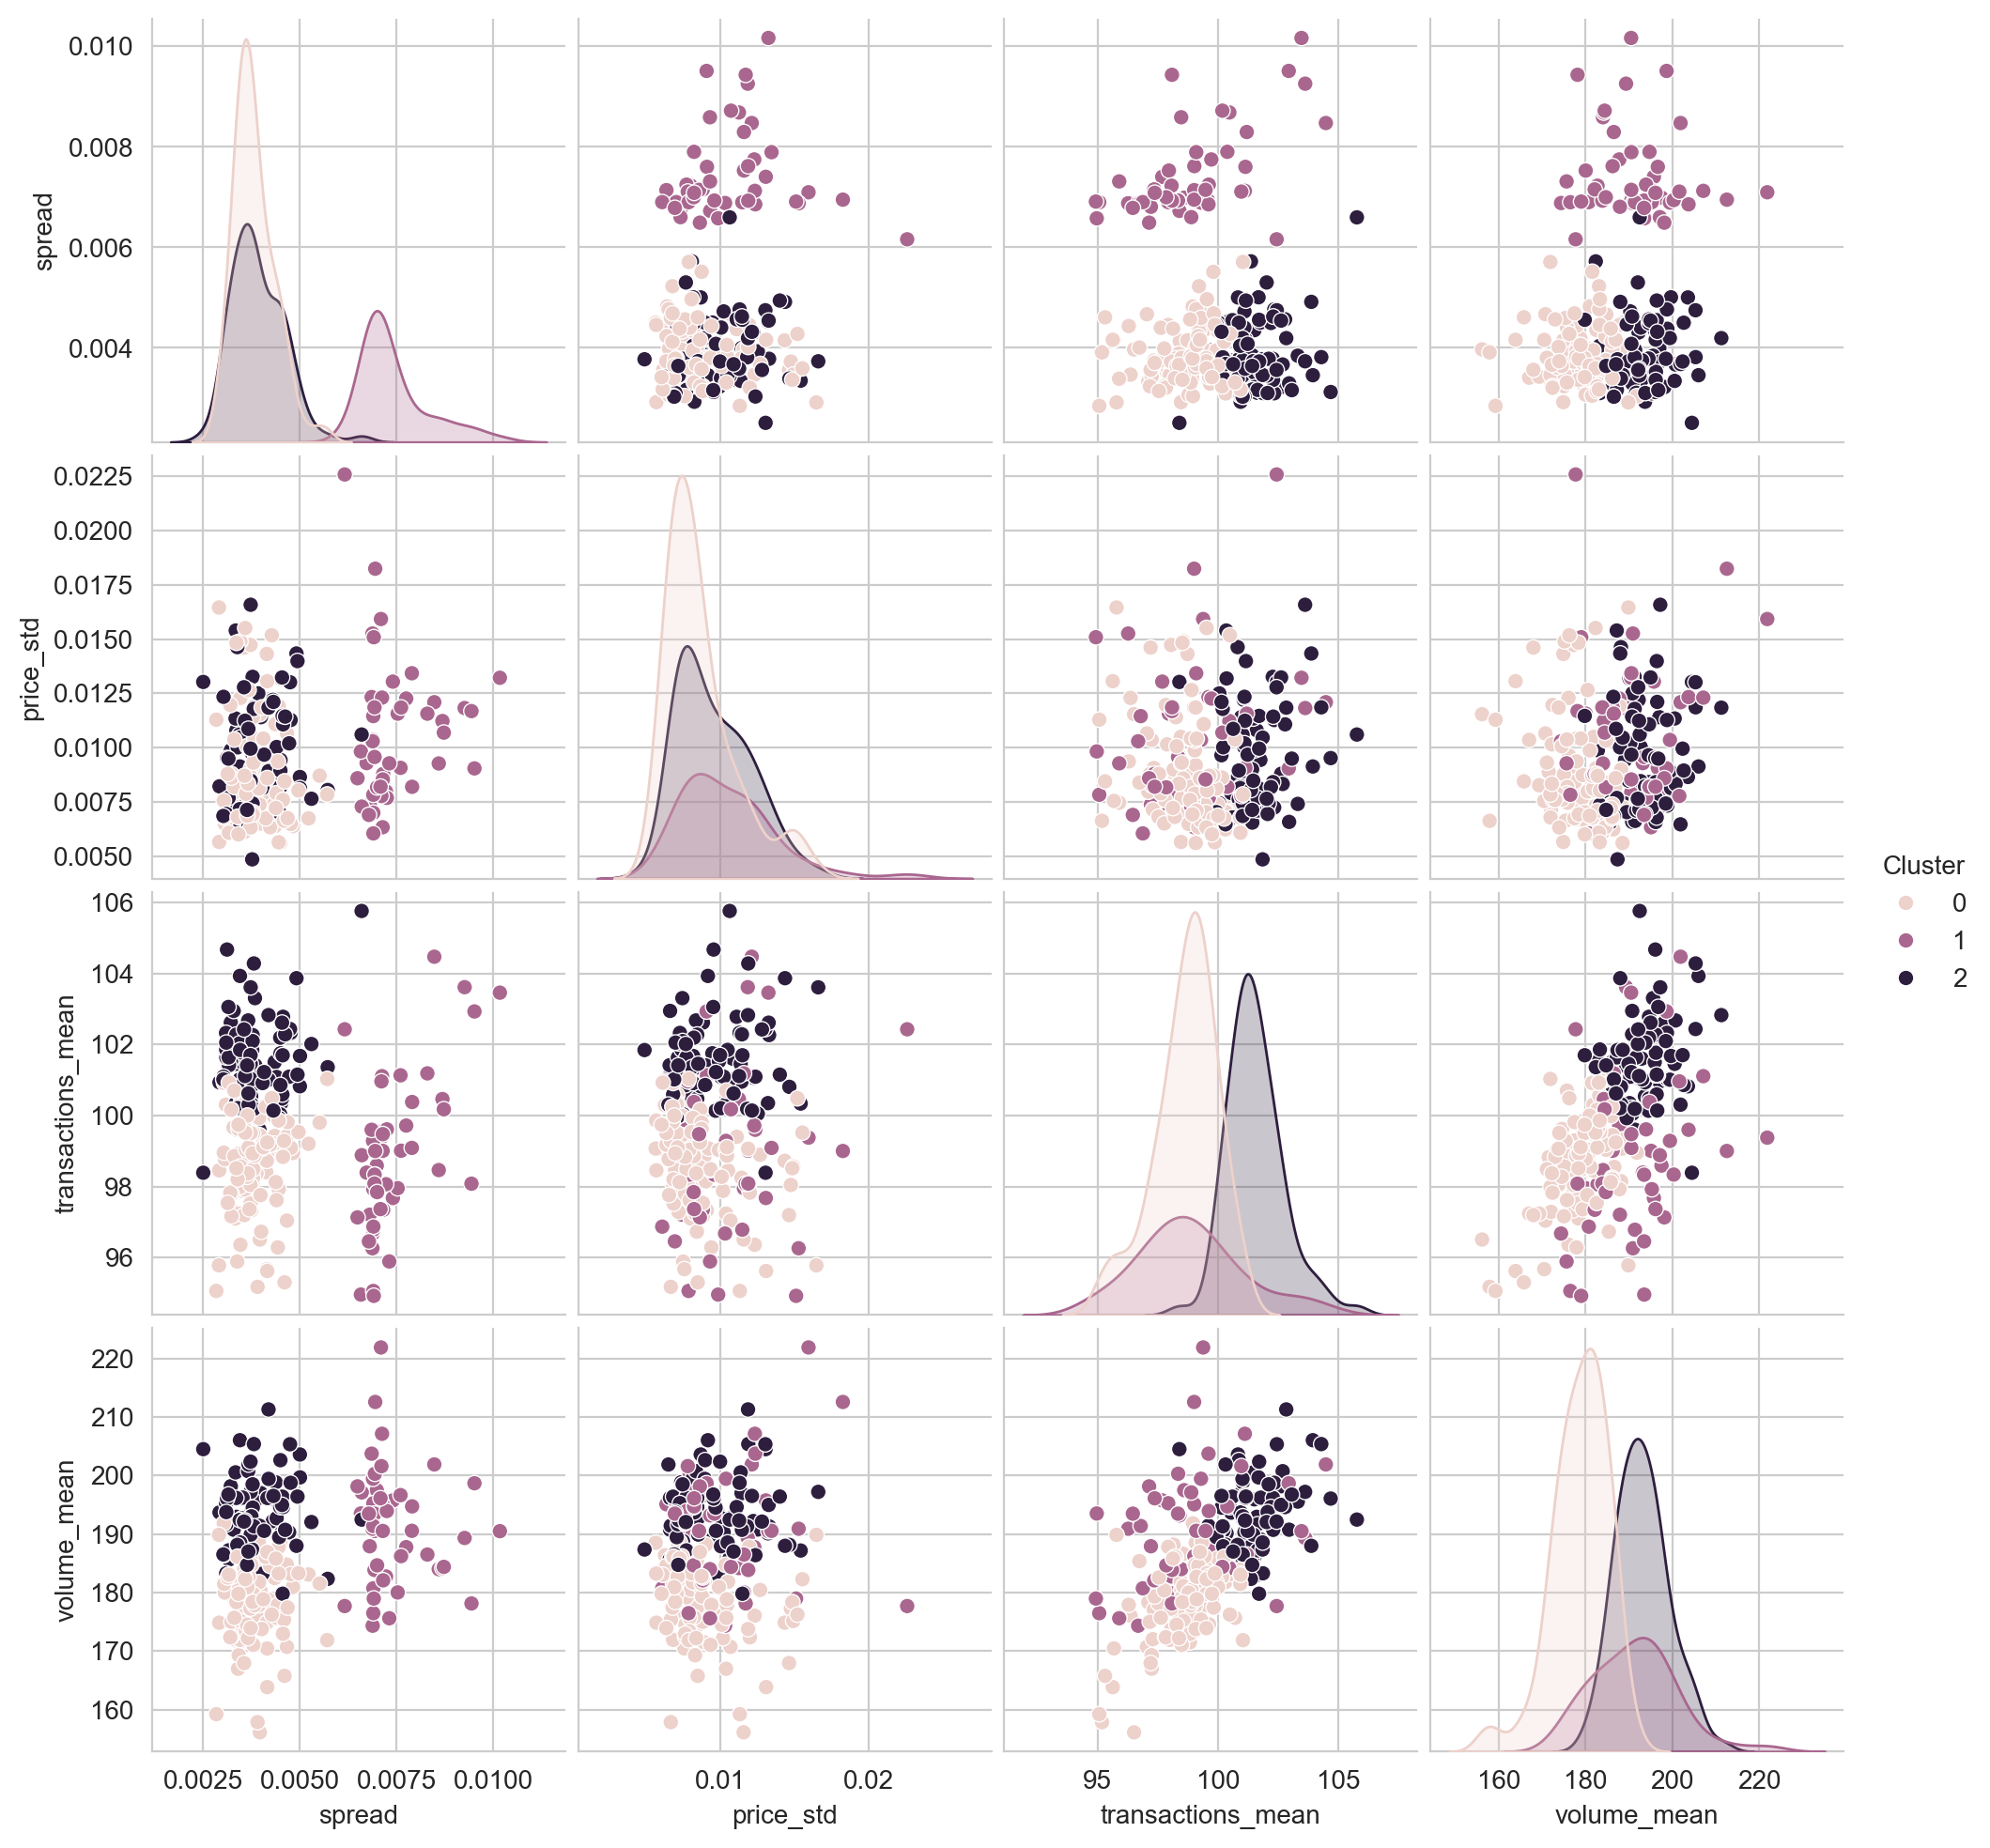

In [20]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)
data['Cluster'] = clusters

sns.pairplot(data.drop(columns='tick_size'), hue='Cluster')
plt.show()

In [21]:
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
centroids_df = pd.DataFrame(centroids, columns=['spread', 'price_std', 'volume_mean', 'transactions_mean'])
centroids_df

,spread,price_std,volume_mean,transactions_mean
0,0.003818,0.008649,178.716309,98.650868
1,0.007415,0.010451,191.243769,98.872227
2,0.003924,0.009545,193.066872,101.541180
